#Importing Necesary Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

#Loading the Data

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Delivery_time.csv')

In [4]:
df

,Unnamed: 0,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,4,29.00,10
5,5,15.35,6
6,6,19.00,7
7,7,9.50,3
8,8,17.90,10
9,9,18.75,9


#EDA and Data Visualization

In [6]:
df.head()

,Unnamed: 0,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,4,29.00,10


In [11]:
#dropping unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
df.shape

(21, 2)

In [15]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [16]:
df.isna()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [17]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

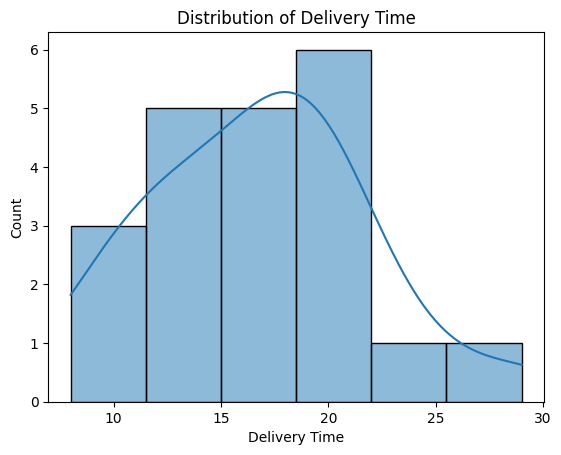

In [19]:
# Visualize the distribution of delivery time
sns.histplot(df['Delivery Time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

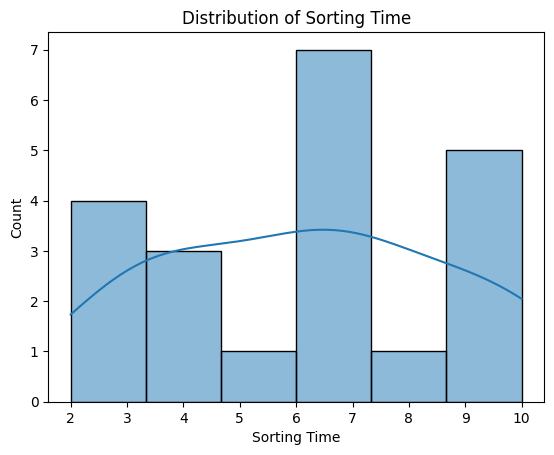

In [20]:
# Visualize the distribution of sorting time
sns.histplot(df['Sorting Time'], kde=True)
plt.title('Distribution of Sorting Time')
plt.show()

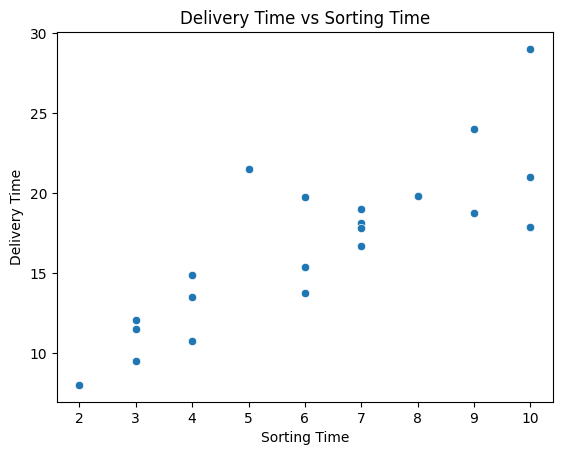

In [21]:
# Visualize the relationship between delivery time and sorting time
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title('Delivery Time vs Sorting Time')
plt.show()

#Correlation Analysis

In [22]:
correlation = df['Delivery Time'].corr(df['Sorting Time'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.8259972607955326


In [23]:
corr_a = df.corr()
corr_a

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

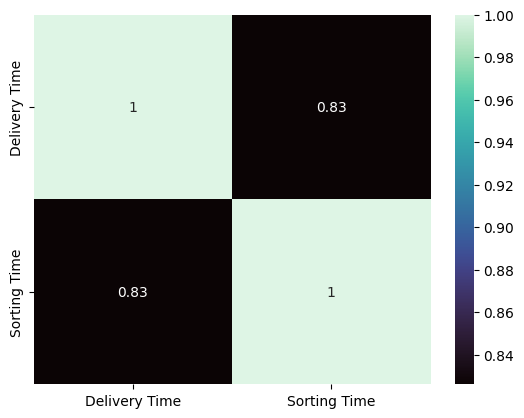

In [24]:
sns.heatmap(corr_a, annot= True,  cmap="mako")

#Model Building

In [26]:
# Split the data into training and testing sets
X = df[['Sorting Time']]
Y = df['Delivery Time']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# Build a linear regression model
model = LinearRegression()

#Model Training and Testing

In [30]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
# Make predictions on the testing set
Y_pred = model.predict(X_test)
print(Y_pred)

[24.9247435  18.85200984 12.77927618 12.77927618 24.9247435 ]


In [33]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 14.04673895663505
R-squared: -1.020759958636741


In [34]:
model.score(X,Y)

0.6396724173614026

# Model Prediction

In [35]:
#inputting new data for prediction
n_sorting_time = np.array([[20]])
n_delivery_time = model.predict(n_sorting_time)
print(n_delivery_time)

[45.16718904]


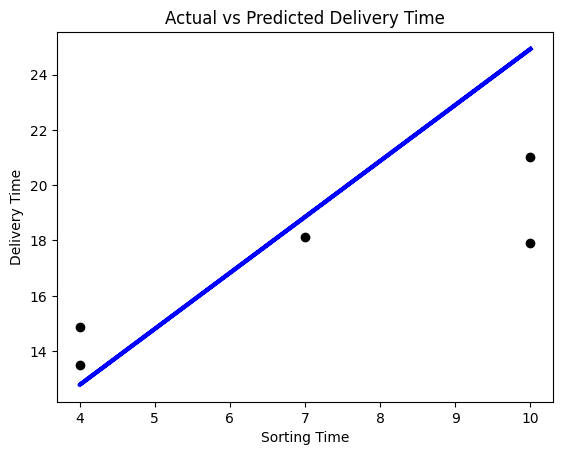

In [36]:
# Visualize actual vs predicted delivery time
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

#Insights

#Correlation Analysis:

* There is a strong positive correlation between sorting time and delivery time, as indicated by the correlation coefficient.


#Model Performance:

* The Mean Squared Error (MSE) and R-squared score provide insights into
the performance of the linear regression model.
* The Mean Squared Error provides an average of the squares of the errors, indicating how close the regression line is to the actual data points. A lower MSE indicates a better fit of the model.
* The R-squared score measures the proportion of the variance in the dependent variable (delivery time) that is predictable from the independent variable (sorting time). A higher R-squared score (closer to 1) indicates a better fit of the model to the data.

#Visualization:

* The scatter plot visualization helps visualize the relationship between sorting time and delivery time, showing how the data points are distributed and how well the regression line fits the data.

#Model Interpretation:

* The linear regression model predicts delivery time based on sorting time, assuming a linear relationship between the two variables.
* The coefficients of the linear regression model can be interpreted as follows: for every one-unit increase in sorting time, the delivery time is expected to increase by the coefficient value.

#Further Analysis:

*Additional features or transformations could be explored to potentially improve the model's performance, such as considering interactions between variables or exploring non-linear relationships.